# DL Models

In [1]:
import os
root_dir = '../../' if os.getcwd().split('/')[-1] != 'credit-now' else './'
os.chdir(root_dir)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

import credit_data
import visualkeras

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
train_data, test_data, train_label, test_label = credit_data.load_data()

train_data = train_data.todense()
test_data = test_data.todense()
train_label = utils.to_categorical(train_label)
test_label = utils.to_categorical(test_label)

print(train_data.shape, test_data.shape, train_label.shape, test_label.shape)

(15906, 67) (6818, 67) (15906, 3) (6818, 3)


## Example 4-1

In [3]:
def make_example_model(input: int, output=3):
    model = models.Sequential()

    model.add(layers.Dense(input_dim=input, units=256, activation=None, kernel_initializer=initializers.he_uniform()))
    model.add(layers.Activation('elu'))

    model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
    model.add(layers.Activation('elu')) 

    model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
    model.add(layers.Activation('elu'))

    model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
    model.add(layers.Activation('elu')) 
    model.add(layers.Dropout(rate=0.5))

    model.add(layers.Dense(units=output, activation='softmax'))

    model.compile(optimizer=optimizers.Adam(),
                loss=losses.categorical_crossentropy, 
                metrics=[metrics.categorical_accuracy])

    return model

In [ ]:
model = make_example_model(train_data.shape[1])

history = model.fit(train_data, train_label, batch_size=100, epochs=10, validation_split=0.3)
result = model.evaluate(test_data, test_label)

In [ ]:
print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

loss (cross-entropy) : 0.8287399411201477
test accuracy : 0.6780581474304199


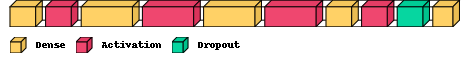

In [5]:
visualkeras.layered_view(model, legend=True)

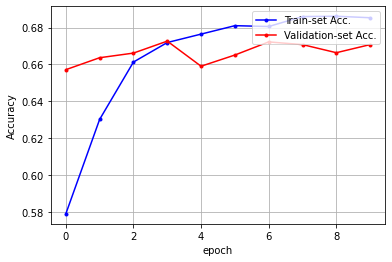

In [7]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

x_len = np.arange(len(acc))

plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.savefig('graphs/example_accuracy')
plt.show()

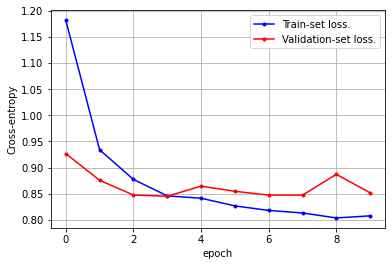

In [8]:
loss = history.history['loss']
val_loss = history.history['val_loss']

x_len = np.arange(len(acc))

plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Cross-entropy')
plt.savefig('graphs/example_loss')
plt.show()

## All Category (Example 4-1)

In [9]:
train_data, test_data, train_label, test_label = credit_data.load_data('train_cat')

train_data = train_data.todense()
test_data = test_data.todense()
train_label = utils.to_categorical(train_label)
test_label = utils.to_categorical(test_label)

print(train_data.shape, test_data.shape, train_label.shape, test_label.shape)

(15906, 103) (6818, 103) (15906, 3) (6818, 3)


In [ ]:
model = make_example_model(train_data.shape[1])

history = model.fit(train_data, train_label, batch_size=100, epochs=10, validation_split=0.3)
result = model.evaluate(test_data, test_label)

loss (cross-entropy) : 0.8626916408538818
test accuracy : 0.6679378747940063


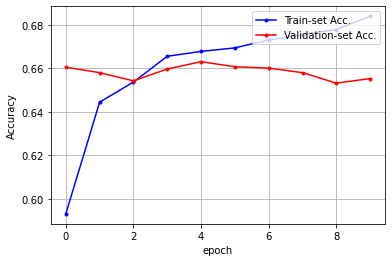

In [11]:
print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

x_len = np.arange(len(acc))

plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.savefig('graphs/example_cat_accuracy')
plt.show()

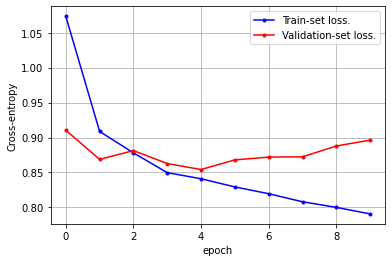

In [12]:
loss = history.history['loss']
val_loss = history.history['val_loss']

x_len = np.arange(len(acc))

plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Cross-entropy')
plt.savefig('graphs/example_cat_loss')
plt.show()

## Compare Models

In [ ]:
columns = ['model', 'test_accuracy']
describe = ['1 hidden','2 hidden','1 hidden by keras tuner','5 hidden with keras tuner','13 hidden with keras tuner hyperband','auto-keras']
accuracy = [0.6592, 0.6676, 0.6921, 0.6918, 0.6915, 0.6514]
acc_map = [[desc, acc] for desc, acc in zip(describe, accuracy)]
df = pd.DataFrame(acc_map, columns=columns)
df

,model,test_accuracy
0,1 hidden,0.6592
1,2 hidden,0.6676
2,1 hidden by keras tuner,0.6921
3,5 hidden with keras tuner,0.6918
4,13 hidden with keras tuner hyperband,0.6915
5,auto-keras,0.6514


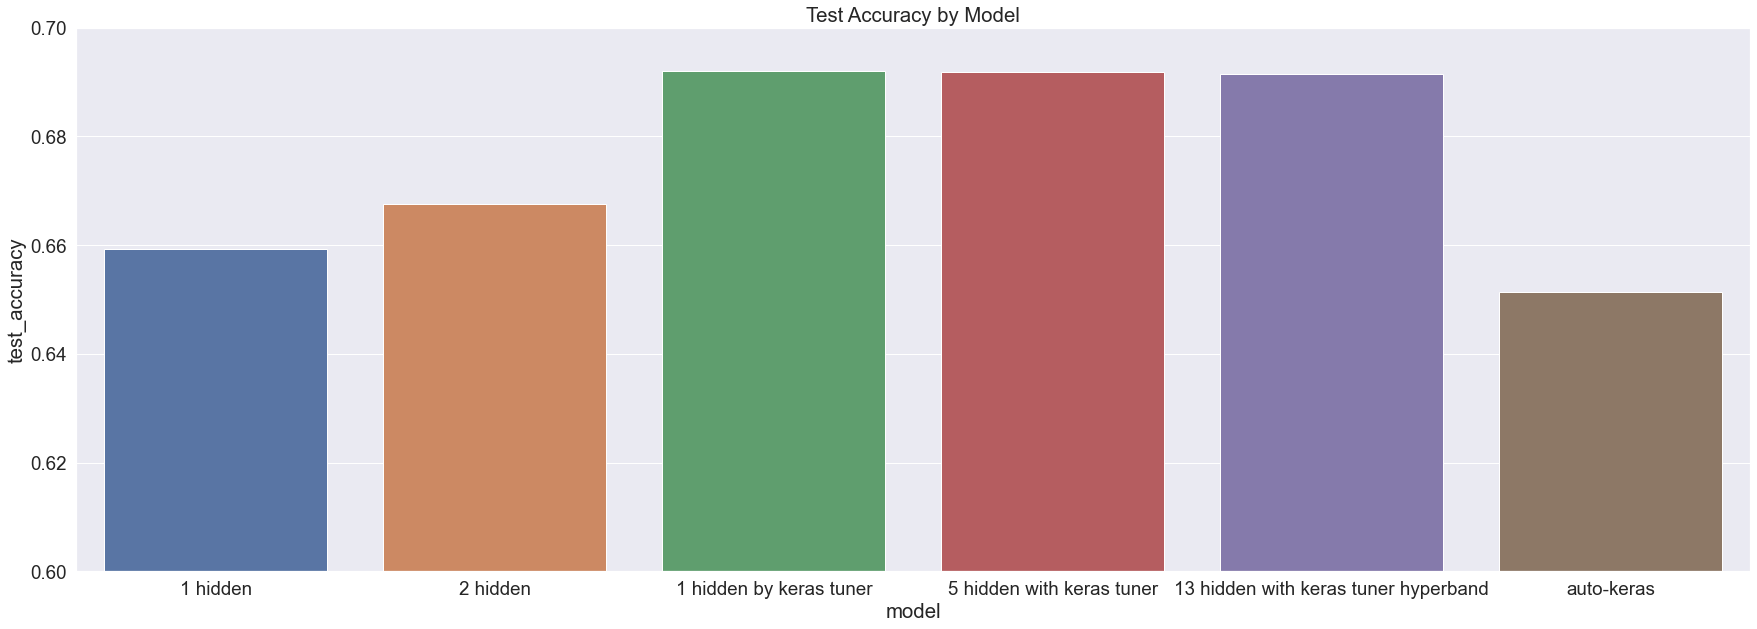

In [ ]:
plt.figure(figsize=(30, 10))
sns.set(font_scale=1.7)
ax = sns.barplot(data=df, x = 'model', y = 'test_accuracy')
ax.set(title='Test Accuracy by Model')
ax.set_ylim(0.6,0.7)
plt.savefig('graphs/keras_accuracy')
plt.show()